# Notebook 2: Exploratory Data Analysis

This notebook focuses on Exploratory Data Analysis (EDA) to understand the dataset's underlying structure, identify patterns, detect anomalies, and test hypotheses. A thorough EDA is crucial for effective feature engineering and model selection.

## Objectives
- Summarize the main characteristics of the data using descriptive statistics.
- Visualize data distributions and relationships between variables.
- Identify key features that are predictive of the diagnosis.
- Formulate and validate assumptions about the data.


## 1. Descriptive Statistics
We will start by computing summary statistics to describe the main features of the dataset quantitatively.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.head()

In [ ]:
# Basic descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

The skewness results indicate the symmetry of the data distribution. Values close to zero suggest a more symmetrical distribution. Based on the feature plots, `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, and `concave points_mean` appear to be strong predictors, as they show clear separation between malignant and benign cases.

In [10]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


The `diagnosis` column is categorical and must be encoded into a numerical format for use in machine learning models. We will confirm the encoding scheme:

- **Malignant -> 1** (presence of cancer)
- **Benign -> 0** (absence of cancer)

The dataset contains 357 benign and 212 malignant cases.

## Unimodal Data Visualizations

Unimodal visualizations help us understand the distribution of a single variable. We will use three techniques to explore the attributes of our dataset:
- **Histograms**: To see the frequency distribution of variables.
- **Density Plots**: To visualize the probability density of variables.
- **Box and Whisker Plots**: To identify the spread, central tendency, and outliers.

These visualizations are crucial for identifying which features are most effective in distinguishing between malignant and benign tumors and for guiding model selection.

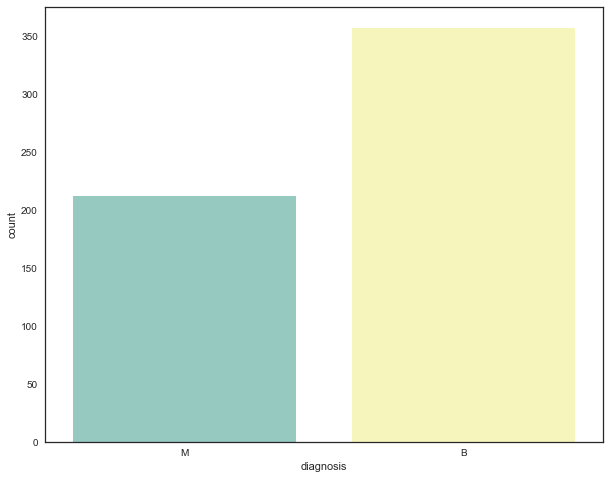

In [ ]:
# Frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
ax = sns.countplot(x='diagnosis', data=data, palette="Set3")
ax.set_title('Diagnosis Count')
plt.show()

### Visualizing Data Distribution with Histograms
Histograms are used to visualize the distribution of numerical variables by grouping them into bins and displaying the frequency of observations in each bin. This helps in understanding the shape of the data distribution (e.g., Gaussian, skewed, exponential) and identifying potential outliers.

To facilitate visualization, we will separate the columns into smaller dataframes based on their suffix (`_mean`, `_se`, `_worst`).

In [ ]:
# Separate columns into groups based on their suffix (_mean, _se, _worst)
data_diag = data['diagnosis']
data_mean = data.iloc[:, 1:11]
data_se = data.iloc[:, 11:21]
data_worst = data.iloc[:, 21:31]

NameError: name 'df_id_diag' is not defined

### Histograms for "_mean" Features

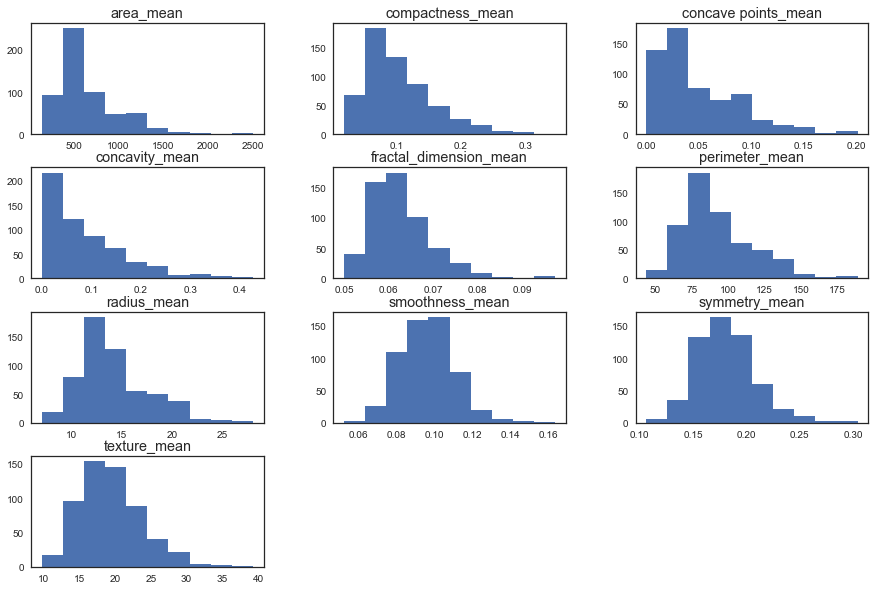

In [ ]:
# Plot histograms of the "_mean" features
hist_mean = data_mean.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

### Histograms for "_se" Features

In [ ]:
# Plot histograms of the "_se" features
hist_se = data_se.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

### Histograms for "_worst" Features

In [ ]:
# Plot histograms of the "_worst" features
hist_worst = data_worst.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

### Observation
From the histograms, we can observe that some attributes like `concavity` and `concave points` appear to have an exponential distribution. In contrast, attributes such as `texture`, `smoothness`, and `symmetry` seem to follow a Gaussian or near-Gaussian distribution. This is a significant observation, as many machine learning algorithms assume a Gaussian distribution for the input variables.

### Visualizing Data Distribution with Density Plots

### Density plots "_mean" suffix designition

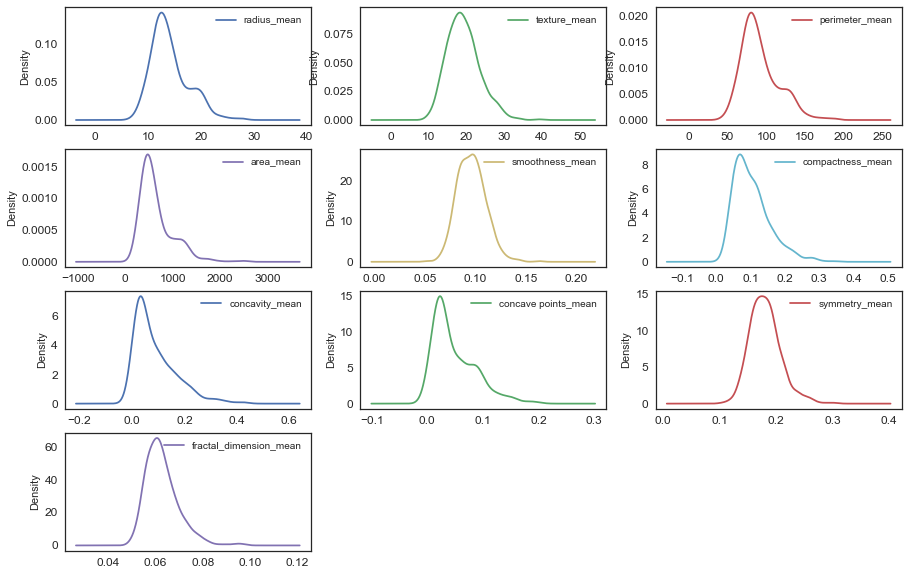

In [ ]:
### Density plots "_mean" suffix designition

# Density plots
axes = data_mean.plot(
    kind='density',
    subplots=True,
    layout=(4, 3),
    sharex=False,
    sharey=False,
    fontsize=12,
    figsize=(15, 10),
)
plt.show()

### Density plots "_se" suffix designition

In [ ]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))
plt.show()


### Density plot "_worst" suffix designition

In [ ]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))
plt.show()


### Observation
The density plots reveal that features such as `perimeter`, `radius`, `area`, `concavity`, and `compactness` may have an exponential distribution. In contrast, `texture`, `smoothness`, and `symmetry` appear to follow a Gaussian or near-Gaussian distribution. This is a critical observation, as many machine learning algorithms perform better when the input variables have a Gaussian distribution.

## 2.3.3 Visualise distribution of data via box plots

### Box plot "_mean" suffix designition

In [ ]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)
plt.show()

### Box plot "_se" suffix designition

In [ ]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)
plt.show()

### Box plot "_worst" suffix designition

In [ ]:
# box and whisker plots
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)
plt.show()

### Observation
The box plots confirm the distributions observed in the density plots. They also help visualize the spread of the data and identify potential outliers. For instance, features like `area_worst` and `area_mean` show a wide range of values, indicating significant variability. The presence of outliers in some features may require further investigation or robust scaling techniques during preprocessing.

# 2.4 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

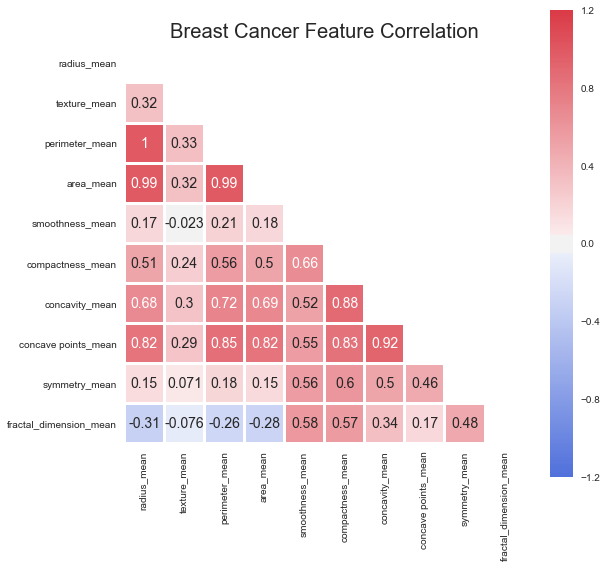

In [ ]:
# plot correlation matrix
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Reload cleaned data and recompute the mean feature block (standalone cell)
data = pd.read_csv('data/clean-data.csv', index_col=False)
for col in ['Unnamed: 0', 'id']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

data_mean = data.iloc[:, 1:11]

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle (np.bool is deprecated)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    vmax=1.2,
    square=True,
    cmap=cmap,
    mask=mask,
    ax=ax,
    annot=True,
    fmt='.2g',
    linewidths=2,
)
plt.show()

### Observation:
The correlation matrix reveals several important relationships between the features:
* **Strong Positive Correlation**: A strong positive correlation (r > 0.75) is observed between mean radius, perimeter, and area. This is expected, as these features are geometrically related.
* **Moderate Positive Correlation**: Moderate positive correlations (0.5 < r < 0.75) exist between concavity and area, concavity and perimeter, etc. This suggests that as the tumor size increases, its concavity also tends to increase.
* **Strong Negative Correlation**: A strong negative correlation is observed between fractal dimension and radius, texture, and perimeter. This indicates that larger tumors tend to have a lower fractal dimension.
    

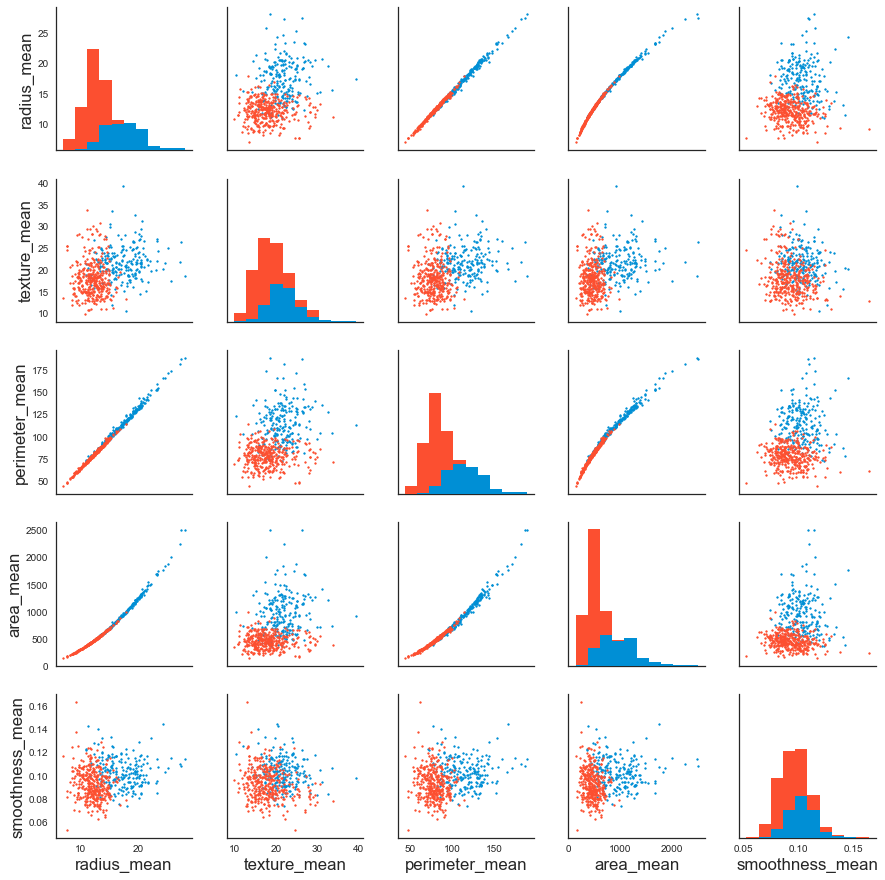

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
for col in ['Unnamed: 0', 'id']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

subset_cols = [
    'diagnosis',
    data.columns[1],
    data.columns[2],
    data.columns[3],
    data.columns[4],
    data.columns[5],
    data.columns[6],
]

g = sns.PairGrid(data[subset_cols], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=3)
g.add_legend()
plt.show()

### Summary

* Mean values of cell radius, perimeter, area, compactness, concavity
    and concave points can be used in classification of the cancer. Larger
    values of these parameters tends to show a correlation with malignant
    tumors.
* mean values of texture, smoothness, symmetry or fractual dimension
    does not show a particular preference of one diagnosis over the other. 
    
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.